In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from scipy import interpolate
myticks = np.linspace(0,256,9,endpoint=True)
sns.set(style="darkgrid")


# e5 码率间接调制

In [12]:


df = pd.concat([df0, df1]).reset_index()
df["PSNR"] = 10*np.log10(255*255/df.mse)
df

active       bpp          mse      np constrain       PSNR
0     32.0  0.074129  1198.812167  393216     point  17.343292
1     48.0  0.100529   318.322575  393216     point  23.102129
2     64.0  0.100529   601.166654  393216     point  20.340855
3     80.0  0.123746   499.616158  393216     point  21.144439
4     96.0  0.126075   697.879246  393216     point  19.693001
5    112.0  0.202662   137.311183  393216     point  26.753745
6    128.0  0.229596   124.911217  393216     point  27.164789
7    144.0  0.331446    92.653950  393216     point  28.462164
8    160.0  0.375300    75.424775  393216     point  29.355663
9    176.0  0.494633    61.005717  393216     point  30.277098
10   192.0  0.556629    51.794479  393216     point  30.987969
11   208.0  0.652246    45.535313  393216     point  31.547320
12   224.0  0.720987    42.531892  393216     point  31.843657
13   240.0  0.805238    40.733237  393216     point  32.031314
14   256.0  0.835242    45.996417  393216     point  31.503564
15    32.0  0.093717   504.312392  393216    vector  21.103807
16    48.0  0.097558   416.787550  393216    vector  21.931656
17    64.0  0.101187   516.168358  393216    vector  21.002890
18    80.0  0.139150   324.249979  393216    vector  23.022004
19    96.0  0.250229   128.347696  393216    vector  27.046923
20   112.0  0.366312    92.974067  393216    vector  28.447185
21   128.0  0.511146    72.171804  393216    vector  29.547128
22   144.0  0.683354    58.232213  393216    vector  30.479171
23   160.0  0.882675    48.579458  393216    vector  31.266277
24   176.0  1.074712    41.566254  393216    vector  31.943395
25   192.0  1.248529    34.143321  393216    vector  32.797746
26   208.0  1.408658    28.935721  393216    vector  33.516461
27   224.0  1.557137    25.629850  393216    vector  34.043343
28   240.0  1.690758    22.970346  393216    vector  34.519128
29   256.0  1.771612    23.600617  393216    vector  34.401570

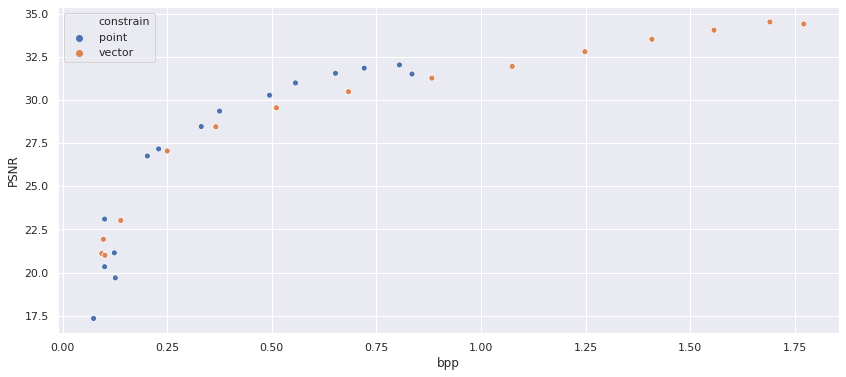

In [13]:
fig, ax = subplots(figsize=(14, 6))
sns.set(style="darkgrid")
sns.scatterplot(x="bpp", y="PSNR", hue="constrain", data=df)
fig.savefig("modulate-rate.pdf")

# e2码率调制

In [20]:

df0 = pd.read_csv("draw/e2-0.csv").groupby("active").mean()
df0["constrain"] = "bpp-vector-tight"

df1 = pd.read_csv("draw/e2-1.csv").groupby("active").mean()
df1["constrain"] = "bpp-vector-loose"

df2 = pd.read_csv("draw/e3.csv").groupby("active").mean()
df2["constrain"] = "lambda-point"

df3 = pd.read_csv("draw/e5.csv").groupby("active").mean()
df3["constrain"] = "lambda-vector"

df4 = pd.read_csv("draw/e8.csv").groupby("active").mean()
df4["constrain"] = "lambda-segment"


In [25]:
df = pd.concat([df0, df1, df2, df3, df4]).reset_index()
df["PSNR"] = 10*np.log10(255*255/df.mse)
df

active       bpp         mse      np         constrain       PSNR
0     32.0  0.231742  194.634163  393216  bpp-vector-tight  25.238613
1     48.0  0.251092  158.108342  393216  bpp-vector-tight  26.141256
2     64.0  0.271150  135.832708  393216  bpp-vector-tight  26.800760
3     80.0  0.293588  134.444808  393216  bpp-vector-tight  26.845363
4     96.0  0.321650  108.759879  393216  bpp-vector-tight  27.766116
..     ...       ...         ...     ...               ...        ...
70   192.0  0.556629   51.794479  393216    lambda-segment  30.987969
71   208.0  0.652246   45.535313  393216    lambda-segment  31.547320
72   224.0  0.720987   42.531892  393216    lambda-segment  31.843657
73   240.0  0.805238   40.733237  393216    lambda-segment  32.031314
74   256.0  0.835242   45.996417  393216    lambda-segment  31.503564

[75 rows x 6 columns]

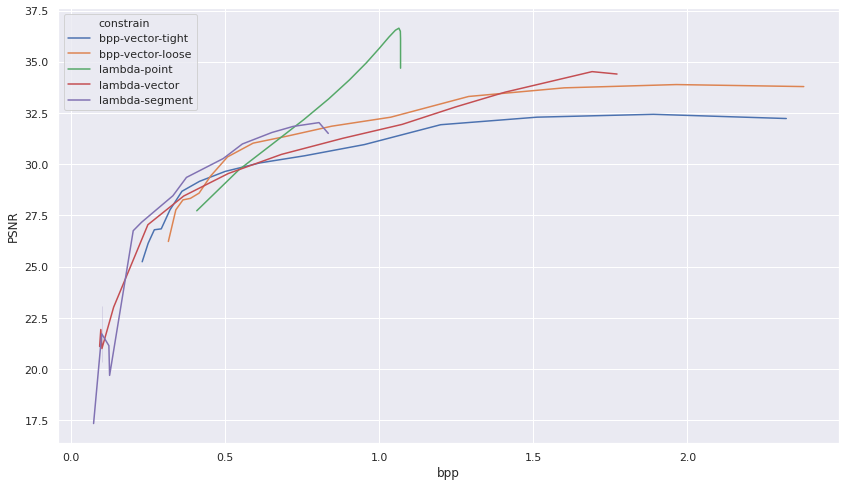

In [30]:
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.lineplot(x="bpp", y="PSNR", hue="constrain", data=df)
#fig.savefig("modulate-rate.pdf")

# e4 通道丢弃

In [36]:
df2 = pd.read_csv("draw/e3.csv").groupby("active").mean()
df2["selection"] = "Intercept"

df3 = pd.read_csv("draw/e5.csv").groupby("active").mean()
df3["selection"] = "base"

df5 = pd.read_csv("draw/e4.csv").groupby("active").mean()
df5["selection"] = "Dropout"

df = pd.concat([df3, df2, df5]).reset_index()
df["PSNR"] = 10*np.log10(255*255/df.mse)
df

active       bpp         mse      np  selection       PSNR
0    32.00  0.093717  504.312392  393216       base  21.103807
1    48.00  0.097558  416.787550  393216       base  21.931656
2    64.00  0.101187  516.168358  393216       base  21.002890
3    80.00  0.139150  324.249979  393216       base  23.022004
4    96.00  0.250229  128.347696  393216       base  27.046923
5   112.00  0.366312   92.974067  393216       base  28.447185
6   128.00  0.511146   72.171804  393216       base  29.547128
7   144.00  0.683354   58.232213  393216       base  30.479171
8   160.00  0.882675   48.579458  393216       base  31.266277
9   176.00  1.074712   41.566254  393216       base  31.943395
10  192.00  1.248529   34.143321  393216       base  32.797746
11  208.00  1.408658   28.935721  393216       base  33.516461
12  224.00  1.557137   25.629850  393216       base  34.043343
13  240.00  1.690758   22.970346  393216       base  34.519128
14  256.00  1.771612   23.600617  393216       base  34.401570
15   32.00  0.408683  109.739579  393216  Intercept  27.727171
16   48.00  0.545296   69.270883  393216  Intercept  29.725296
17   64.00  0.659542   51.055962  393216  Intercept  31.050339
18   80.00  0.755879   39.383538  393216  Intercept  32.177656
19   96.00  0.836721   31.189121  393216  Intercept  33.190772
20  112.00  0.904067   25.192933  393216  Intercept  34.118016
21  128.00  0.958529   20.821729  393216  Intercept  34.945636
22  144.00  1.001167   17.646067  393216  Intercept  35.664324
23  160.00  1.031817   15.583096  393216  Intercept  36.204266
24  176.00  1.052962   14.421492  393216  Intercept  36.540702
25  192.00  1.064217   14.098037  393216  Intercept  36.639217
26  208.00  1.068962   14.592562  393216  Intercept  36.489488
27  224.00  1.069596   15.901029  393216  Intercept  36.116551
28  240.00  1.069608   18.354267  393216  Intercept  35.493433
29  256.00  1.069621   22.101050  393216  Intercept  34.686675
30    0.00  2.945312   18.390957  393216    Dropout  35.484760
31    0.05  2.798800   23.523761  393216    Dropout  34.415736
32    0.10  2.652267   27.230871  393216    Dropout  33.780188
33    0.15  2.505733   33.014846  393216    Dropout  32.943711
34    0.20  2.359212   37.126265  393216    Dropout  32.433991
35    0.25  2.212683   42.889290  393216    Dropout  31.807315
36    0.30  2.066129   48.459871  393216    Dropout  31.276981
37    0.35  1.919629   55.365881  393216    Dropout  30.698381
38    0.40  1.773079   61.544638  393216    Dropout  30.238901
39    0.45  1.626562   67.875628  393216    Dropout  29.813665
40    0.50  1.480021   78.833424  393216    Dropout  29.163700
41    0.55  1.333488   90.961785  393216    Dropout  28.542214
42    0.60  1.186963  101.465290  393216    Dropout  28.067629
43    0.65  1.040425  114.978365  393216    Dropout  27.524642
44    0.70  0.893900  144.196374  393216    Dropout  26.541260
45    0.75  0.747367  178.148081  393216    Dropout  25.622992

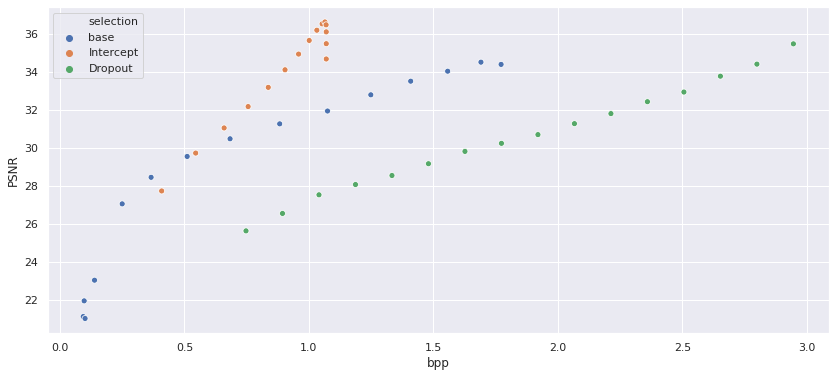

In [40]:
fig, ax = subplots(figsize=(14, 6))
sns.set(style="darkgrid")
sns.scatterplot(x="bpp", y="PSNR", hue="selection", data=df)
fig.savefig("select-channel.pdf")

# 有限无限

In [50]:
data1 = pd.read_csv("draw/f4.csv")
df = data1.groupby("level").mean().reset_index()
df["PSNR"] = 10*np.log10(255*255/df.mse)
df["levels"] = "8p"

data2 = pd.read_csv("draw/f6.csv")
dg = data2.groupby("level").mean().reset_index()
dg["PSNR"] = 10*np.log10(255*255/dg.mse)
dg["levels"] = "64p"

dd = pd.concat([df, dg])
dd

level       bpp         mse      np       PSNR levels
0     0.0  0.139821  226.862950  393216  24.573168     8p
1     1.0  0.209363  116.084746  393216  27.483052     8p
2     2.0  0.313696   62.574983  393216  30.166796     8p
3     3.0  0.461488   35.834450  393216  32.587796     8p
4     4.0  0.656779   21.297646  393216  34.847488     8p
..    ...       ...         ...     ...        ...    ...
59   59.0  1.342838    9.326771  393216  38.433491    64p
60   60.0  1.381271   10.849279  393216  37.776795    64p
61   61.0  1.425742    8.437258  393216  38.868790    64p
62   62.0  1.476571    8.088862  393216  39.051929    64p
63   63.0  1.523433    8.506292  393216  38.833401    64p

[72 rows x 6 columns]

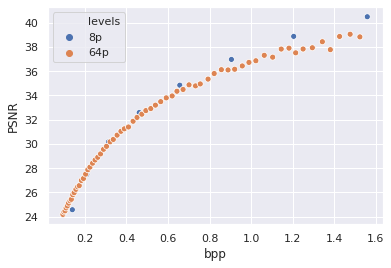

In [58]:
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="bpp", y="PSNR", hue="levels", data=dd)

In [52]:
# fig.savefig("cond-8p-64p.pdf")

# Dynamic_Mask

In [166]:
data = pd.read_csv("dynamic_mask.csv")
dg = data.groupby(['level', 'name']).mean()
dg["var"] = data.groupby(['level', 'name']).var()["value"]
dg = dg.reset_index()
dg

level     name  width  width.1     value       var
0        0   Ans-L0  127.5    127.5  0.363522  0.151176
1        0   Ans-L1  127.5    127.5  0.239585  0.013567
2        0   Ans-L2  127.5    127.5  0.268996  0.001769
3        0   Ans-L3  127.5    127.5  0.141209  0.019942
4        0  HAns-L0  127.5    127.5  0.383458  0.048002
..     ...      ...    ...      ...       ...       ...
99       7  HSyn-L1  127.5    127.5  0.502157  0.034793
100      7  HSyn-L2  127.5    127.5  0.434561  0.140361
101      7   Syn-L0  127.5    127.5  0.157802  0.020181
102      7   Syn-L1  127.5    127.5  0.212449  0.008804
103      7   Syn-L2  127.5    127.5  0.368916  0.011711

[104 rows x 6 columns]

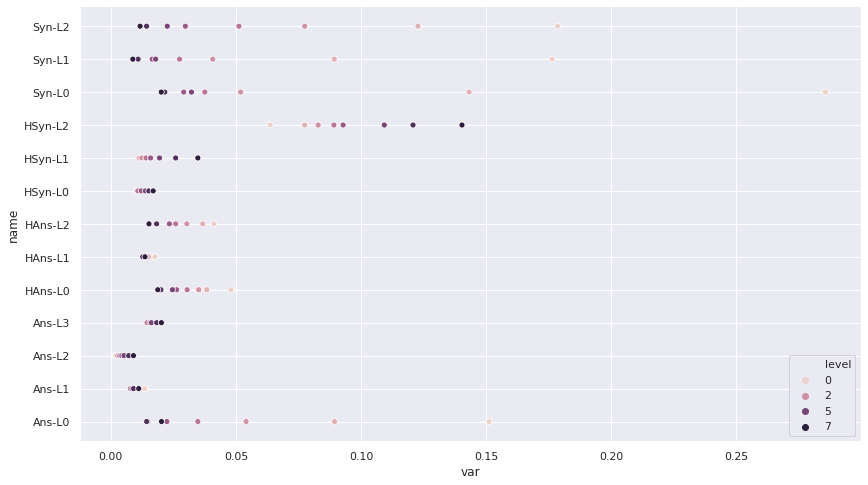

In [167]:
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="var", y="name", hue="level", data=dg)

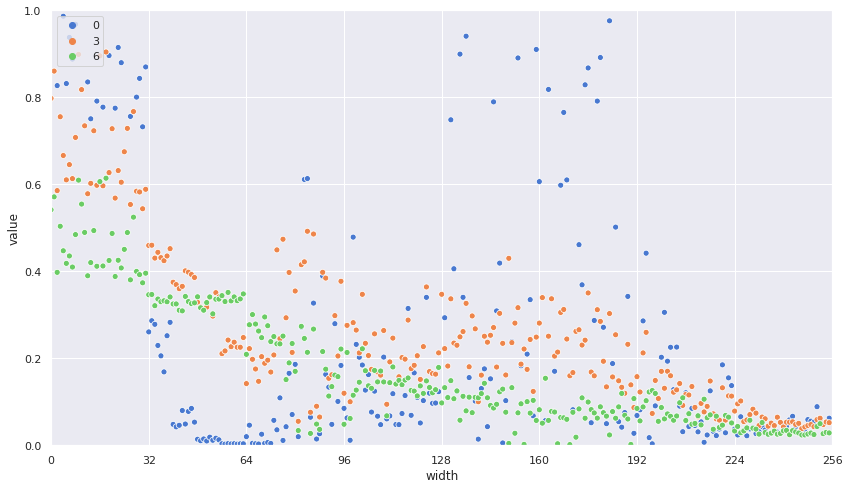

In [168]:
df = data[data.name=="Syn-L0"][data.level.isin([0,3,6])]
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="width", y="value", hue="level", palette="muted", data=df)
xlim(0, 256)
ylim(0,1)
xticks(myticks)
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=2,handles=handles[1:], labels=labels[1:])

In [146]:
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s = np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
    if window == 'flat': #moving average
        w = np.ones(window_len,'d')
    else:  
        w = eval('np.'+window+'(window_len)')
    y = np.convolve(w/w.sum(),s,mode='same')
    return y[window_len:-window_len+1]

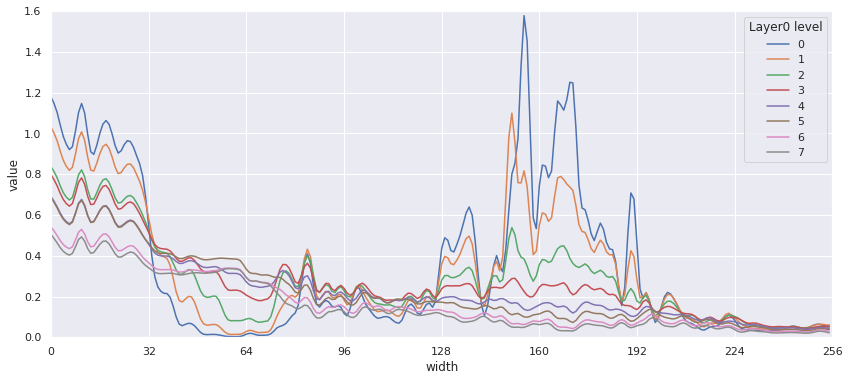

In [181]:
ln = 0
ddd = data[data.name=="Syn-L%d"%ln]

fig, ax = subplots(figsize=(14, 6))

for i in range(8):
    df = ddd[ddd.level.isin([i])]
    x = df.width
    y = np.array(df.value)
    sy = smooth(y,window_len=8)
    plt.plot(x, sy, label=str(i))

xticks(myticks)
xlim(0,256)
ylim(0,1.6)
xlabel("width")
ylabel("value")
legend(title='Layer%d level'%ln)
fig.savefig("dymask-layer%d.pdf"%ln)

# 子网络评估

In [57]:
data = pd.read_csv("draw/f5.csv",dtype={'hash':str})
df = data
df["PSNR"] = 10*np.log10(255*255/df.mse)
df["hash"] = "p"+df.hash
df

hash  level     bpp       mse       PSNR
0    p032032032      0  0.1571  128.1510  27.053584
1    p032032032      1  0.2319   98.1890  28.210175
2    p032032032      2  0.3447   85.3359  28.819486
3    p032032032      3  0.5037   62.1038  30.199622
4    p032032032      4  0.7064   51.1694  31.040700
..          ...    ...     ...       ...        ...
995  p256256256      3  0.5037   34.8953  32.703134
996  p256256256      4  0.7064   20.8944  34.930505
997  p256256256      5  0.9626   13.2923  36.894802
998  p256256256      6  1.2749    8.7103  38.730472
999  p256256256      7  1.6281    6.3294  40.117178

[1000 rows x 5 columns]

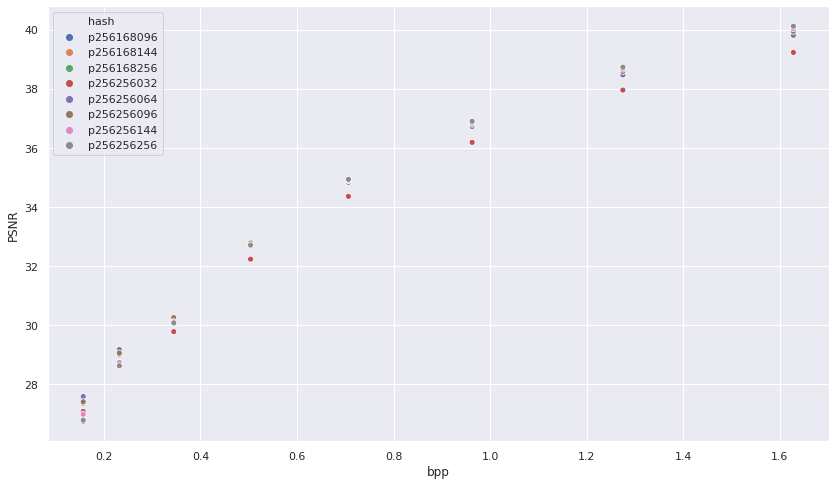

In [43]:
fig, ax = subplots(figsize=(14, 8))
sns.scatterplot(x="bpp", y="PSNR", hue="hash", data=df)

# BD-Metric

In [ ]:
from bd_metric import *

In [17]:
data = pd.read_csv("arch.csv")
df = data
df["PSNR"] = 10*np.log10(255*255/df.mse)
df["hash"] = df.c0*1000000+df.c1*1000+df.c2
df.hash = df.hash.map('p{:09d}'.format)
df

c0   c1   c2  level     bpp       mse       PSNR        hash
0        32   32   32      0  0.1571  128.1510  27.053584  p032032032
1        32   32   32      1  0.2319   98.1890  28.210175  p032032032
2        32   32   32      2  0.3447   85.3359  28.819486  p032032032
3        32   32   32      3  0.5037   62.1038  30.199622  p032032032
4        32   32   32      4  0.7064   51.1694  31.040700  p032032032
...     ...  ...  ...    ...     ...       ...        ...         ...
195107  256  256  256      3  0.5037   34.8953  32.703134  p256256256
195108  256  256  256      4  0.7064   20.8944  34.930505  p256256256
195109  256  256  256      5  0.9626   13.2923  36.894802  p256256256
195110  256  256  256      6  1.2749    8.7103  38.730472  p256256256
195111  256  256  256      7  1.6281    6.3294  40.117178  p256256256

[195112 rows x 8 columns]

In [18]:
dg = df.pivot(columns='hash', index='bpp', values="PSNR").reset_index()
dg

hash     bpp  p032032032  p032032040  p032032048  p032032056  p032032064  \
0     0.1571   27.053584   27.218099   27.256113   27.305140   27.328757   
1     0.2319   28.210175   28.515748   28.591782   28.692017   28.732422   
2     0.3447   28.819486   29.223492   29.338634   29.470886   29.527987   
3     0.5037   30.199622   30.845756   31.011694   31.221811   31.311710   
4     0.7064   31.040700   31.777655   31.970325   32.208570   32.315744   
5     0.9626   31.521608   32.331688   32.535029   32.789908   32.905279   
6     1.2749   31.973280   32.702699   32.901382   33.139007   33.259349   
7     1.6281   32.237687   32.909023   33.098114   33.316764   33.435013   

hash  p032032072  p032032080  p032032088  p032032096  ...  p256256184  \
0      27.182785   27.246150   27.274612   27.350239  ...   26.789769   
1      28.620125   28.698689   28.724005   28.797855  ...   28.598156   
2      29.480066   29.559989   29.579272   29.609464  ...   30.043038   
3      31.290514   31.368423   31.392423   31.407091  ...   32.668747   
4      32.328159   32.398698   32.426390   32.438048  ...   34.898159   
5      32.933797   32.995911   33.026815   33.035687  ...   36.860145   
6      33.297142   33.354701   33.388262   33.397131  ...   38.695809   
7      33.467719   33.522982   33.557845   33.564638  ...   40.076747   

hash  p256256192  p256256200  p256256208  p256256216  p256256224  p256256232  \
0      26.797526   26.803671   26.804080   26.807681   26.806446   26.817787   
1      28.610536   28.613932   28.614927   28.618075   28.618658   28.633036   
2      30.055075   30.055629   30.055426   30.058708   30.060564   30.071359   
3      32.681842   32.680926   32.682932   32.687493   32.689987   32.698445   
4      34.907825   34.907721   34.910990   34.917409   34.919627   34.924315   
5      36.869457   36.871146   36.875373   36.883577   36.885924   36.888697   
6      38.703829   38.708689   38.712361   38.722801   38.725539   38.727233   
7      40.085116   40.090841   40.096301   40.107993   40.111007   40.112926   

hash  p256256240  p256256248  p256256256  
0      26.770054   26.772369   26.772728  
1      28.613034   28.615680   28.615884  
2      30.066494   30.068800   30.069594  
3      32.700298   32.702587   32.703134  
4      34.928697   34.930214   34.930505  
5      36.893038   36.894541   36.894802  
6      38.728977   38.730223   38.730472  
7      40.115257   40.117521   40.117178  

[8 rows x 24390 columns]

In [22]:
len(range(32,257,8))

29

In [24]:
from bd_metric import *

In [53]:
df

hash  level     bpp       mse       PSNR
936  p256168096      0  0.1571  119.6275  27.352493
937  p256168096      1  0.2319   81.7404  29.006436
938  p256168096      2  0.3447   61.9463  30.210650
939  p256168096      3  0.5037   34.6427  32.734686
940  p256168096      4  0.7064   21.2846  34.850149
..          ...    ...     ...       ...        ...
995  p256256256      3  0.5037   34.8953  32.703134
996  p256256256      4  0.7064   20.8944  34.930505
997  p256256256      5  0.9626   13.2923  36.894802
998  p256256256      6  1.2749    8.7103  38.730472
999  p256256256      7  1.6281    6.3294  40.117178

[64 rows x 5 columns]

In [59]:
dg = df.pivot(columns='hash', index='bpp', values="PSNR").reset_index()
dg

hash     bpp  p032032032  p032032064  p032032096  p032032144  p032032256  \
0     0.1571   27.053584   27.328757   27.350239   27.313537   27.289000   
1     0.2319   28.210175   28.732422   28.797855   28.780762   28.777772   
2     0.3447   28.819486   29.527987   29.609464   29.612273   29.631342   
3     0.5037   30.199622   31.311710   31.407091   31.410971   31.447476   
4     0.7064   31.040700   32.315744   32.438048   32.465733   32.511089   
5     0.9626   31.521608   32.905279   33.035687   33.078544   33.127355   
6     1.2749   31.973280   33.259349   33.397131   33.448424   33.499267   
7     1.6281   32.237687   33.435013   33.564638   33.619144   33.670576   

hash  p032072032  p032072064  p032072096  p032072144  ...  p256168032  \
0      27.058762   27.465062   27.501086   27.437461  ...   27.009984   
1      28.409822   28.904250   28.965838   28.924578  ...   28.544018   
2      29.193502   29.688916   29.780560   29.786336  ...   29.708294   
3      30.807389   31.478691   31.580678   31.606435  ...   32.145547   
4      31.766276   32.473990   32.602054   32.660851  ...   34.265457   
5      32.310648   33.063562   33.193380   33.265323  ...   36.066107   
6      32.710271   33.403897   33.541858   33.622541  ...   37.826426   
7      32.922288   33.576797   33.705520   33.785338  ...   39.080458   

hash  p256168064  p256168096  p256168144  p256168256  p256256032  p256256064  \
0      27.537063   27.352493   26.933963   26.726487   27.067728   27.573501   
1      29.128023   29.006436   28.698837   28.583291   28.605155   29.165811   
2      30.197790   30.210650   30.080963   30.042667   29.770400   30.230733   
3      32.730864   32.734686   32.672378   32.669562   32.227090   32.768579   
4      34.791557   34.850149   34.868982   34.900119   34.354536   34.829874   
5      36.674365   36.756345   36.806189   36.861376   36.182553   36.718470   
6      38.416282   38.543827   38.622970   38.696897   37.953794   38.465303   
7      39.750881   39.900237   39.987861   40.078514   39.228159   39.807695   

hash  p256256096  p256256144  p256256256  
0      27.396168   26.970993   26.772725  
1      29.045889   28.727557   28.615884  
2      30.244482   30.107781   30.069594  
3      32.772396   32.706608   32.703134  
4      34.885613   34.902370   34.930505  
5      36.796117   36.844679   36.894802  
6      38.585291   38.663531   38.730472  
7      39.947093   40.034668   40.117178  

[8 rows x 126 columns]

In [25]:
def calc_paras(s):
    wf = (256, int(s[1:4]), int(s[4:7]), int(s[7:]), 3)
    paras = 0
    for i in range(4):
        out = wf[i+1]
        paras += 25*wf[i]*out + out + 16*out + out*out + out
    paras -= 12
    return paras

bdpsnr = {}
paras = {}
bpp = np.array(dg["bpp"])
refPSNR = np.array(dg["p256256256"])
for hash in list(dg.keys())[1:]:
    psnr = np.array(dg[hash])
    bdpsnr[hash] = BD_PSNR(bpp, psnr, bpp, refPSNR)
    paras[hash] = calc_paras(hash)/5144883.0
# sorted(calc.items(), key=lambda d: d[1]) 


In [26]:
merg = []
for key in bdpsnr.keys():
    merg.append([key, bdpsnr[key], paras[key]])
merg
df = pd.DataFrame(merg,columns=['hash','bdpsnr','paras'])
df

hash    bdpsnr     paras
0      p032032032  2.998009  0.051168
1      p032032040  2.443951  0.052668
2      p032032048  2.298299  0.054193
3      p032032056  2.119339  0.055744
4      p032032064  2.038102  0.057319
...           ...       ...       ...
24384  p256256224  0.004258  0.956630
24385  p256256232 -0.003514  0.967435
24386  p256256240  0.002419  0.978265
24387  p256256248  0.000369  0.989120
24388  p256256256  0.000000  1.000000

[24389 rows x 3 columns]

In [27]:
dg = df[df.bdpsnr<=0][df.paras<=0.5]


hash    bdpsnr     paras
3130   p056192248 -0.000084  0.378373
3131   p056192256 -0.000589  0.386765
3158   p056200240 -0.000944  0.382150
3159   p056200248 -0.002043  0.390828
3160   p056200256 -0.002550  0.399531
...           ...       ...       ...
22164  p240112096 -0.030667  0.499812
22189  p240120064 -0.016880  0.493029
22918  p248088096 -0.000699  0.473770
23001  p248112064 -0.001103  0.495915
23759  p256088096 -0.000666  0.487954

[2919 rows x 3 columns]

In [115]:
dh = dg[dg.hash.isin(['p088128064','p088128096','p088168096','p088256064','p088256096','p256256256'])]
dj = df[df.hash.str.startswith("p080")]
dk = dj[dj.hash.str.endswith("096")]
dm = dj[dj.hash.str.startswith("p080128")]

([<matplotlib.axis.YTick at 0x7f7971e66780>,
 <a list of 5 Text major ticklabel objects>)

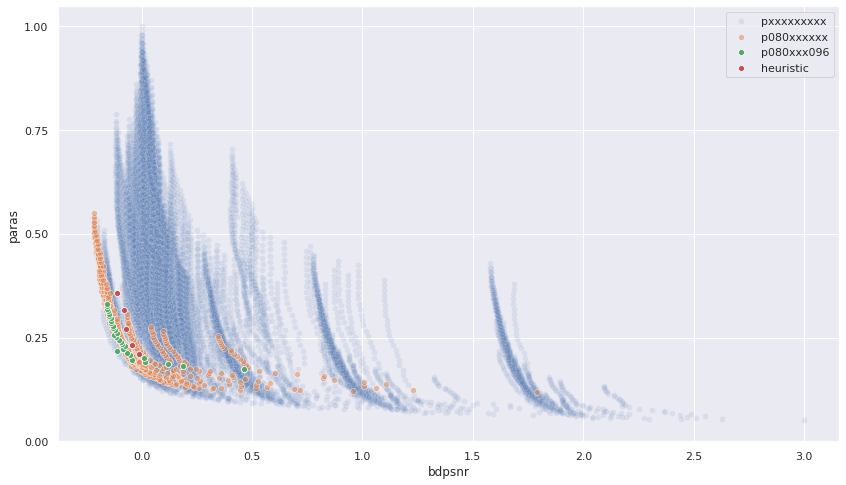

In [116]:
fig, ax = subplots(figsize=(14, 8))
dff = df[~df.hash.isin(dj.hash)]
djj = dj[~dj.hash.isin(dk.hash)]
sns.scatterplot(x="bdpsnr", y="paras", data=dff, alpha = 0.1, label='pxxxxxxxxx')
#sns.scatterplot(x="bdpsnr", y="paras", data=dg, alpha = 0.1)
sns.scatterplot(x="bdpsnr", y="paras", data=djj, alpha = 0.5, label='p080xxxxxx')
sns.scatterplot(x="bdpsnr", y="paras", data=dk, alpha = 1, label='p080xxx096')
sns.scatterplot(x="bdpsnr", y="paras", data=dh, alpha = 1, label='heuristic')

yticks([0,0.25,0.5,0.75,1])

#fig.savefig("eval-subnet.pdf")

In [95]:
fig.savefig("allsubnet.png")


hash    bdpsnr     paras
5054  p080032096  0.204006  0.132255
5083  p080040096  0.100088  0.139236
5112  p080048096  0.059521  0.146243
5141  p080056096  0.036821  0.153274
5170  p080064096 -0.003237  0.160331
5199  p080072096 -0.000992  0.167412
5228  p080080096 -0.025770  0.174518
5257  p080088096 -0.042996  0.181649
5286  p080096096 -0.039965  0.188805
5315  p080104096 -0.056671  0.195986
5344  p080112096 -0.077228  0.203191
5373  p080120096 -0.089678  0.210422
5402  p080128096 -0.110153  0.217677
5431  p080136096 -0.111634  0.224957
5460  p080144096 -0.119694  0.232262
5489  p080152096 -0.133179  0.239592
5518  p080160096 -0.135890  0.246947
5547  p080168096 -0.145838  0.254327
5576  p080176096 -0.151415  0.261732
5605  p080184096 -0.156808  0.269161
5634  p080192096 -0.164246  0.276616
5663  p080200096 -0.165553  0.284095
5692  p080208096 -0.170519  0.291599
5721  p080216096 -0.176625  0.299128
5750  p080224096 -0.179271  0.306682
5779  p080232096 -0.182830  0.314261
5808  p080240096 -0.185635  0.321864
5837  p080248096 -0.186702  0.329493
5866  p080256096 -0.186371  0.337146

# Mask

In [39]:
data = pd.read_csv("draw/mask.csv")
df = data[data.name=="analysis_transform/layer_0/fc_u/Softplus:0"][data.level.isin([0,3,6])]

In [88]:
dg = data.groupby(['level', 'name']).mean()
dg["var"] = data.groupby(['level', 'name']).var()["value"]
dg = dg.reset_index()
dg

level                                               name  Unnamed: 0  \
0        0         analysis_transform/layer_0/fc_u/Softplus:0       127.5   
1        0         analysis_transform/layer_1/fc_u/Softplus:0       127.5   
2        0         analysis_transform/layer_2/fc_u/Softplus:0       127.5   
3        0         analysis_transform/layer_3/fc_u/Softplus:0       127.5   
4        0   hyper_analysis_transform/layer_0/fc_u/Softplus:0       127.5   
..     ...                                                ...         ...   
99       7  hyper_synthesis_transform/layer_1/fc_u/Softplus:0       127.5   
100      7  hyper_synthesis_transform/layer_2/fc_u/Softplus:0       127.5   
101      7        synthesis_transform/layer_0/fc_u/Softplus:0       127.5   
102      7        synthesis_transform/layer_1/fc_u/Softplus:0       127.5   
103      7        synthesis_transform/layer_2/fc_u/Softplus:0       127.5   

     width     value       var  
0    127.5  0.452350  0.077690  
1    127.5  0.286239  0.018151  
2    127.5  0.369442  0.001470  
3    127.5  0.170098  0.021865  
4    127.5  0.449685  0.026918  
..     ...       ...       ...  
99   127.5  0.780481  0.065631  
100  127.5  0.639531  0.089240  
101  127.5  0.315425  0.009382  
102  127.5  0.379411  0.005488  
103  127.5  0.516262  0.013226  

[104 rows x 6 columns]

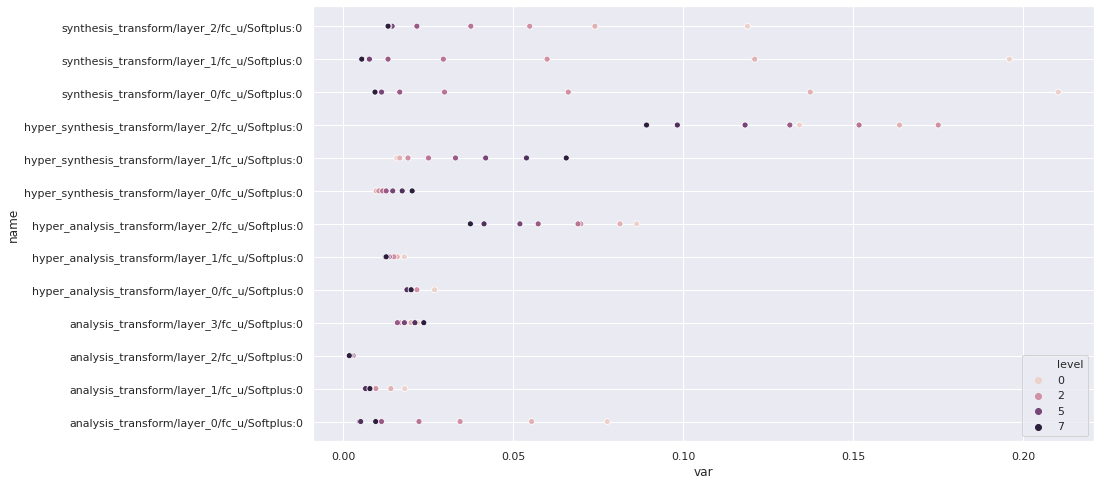

In [91]:
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="var", y="name", hue="level", data=dg)
#xlim(0, 256)
#ylim(0,1)
#xticks(myticks)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(loc=2,handles=handles[1:], labels=labels[1:])

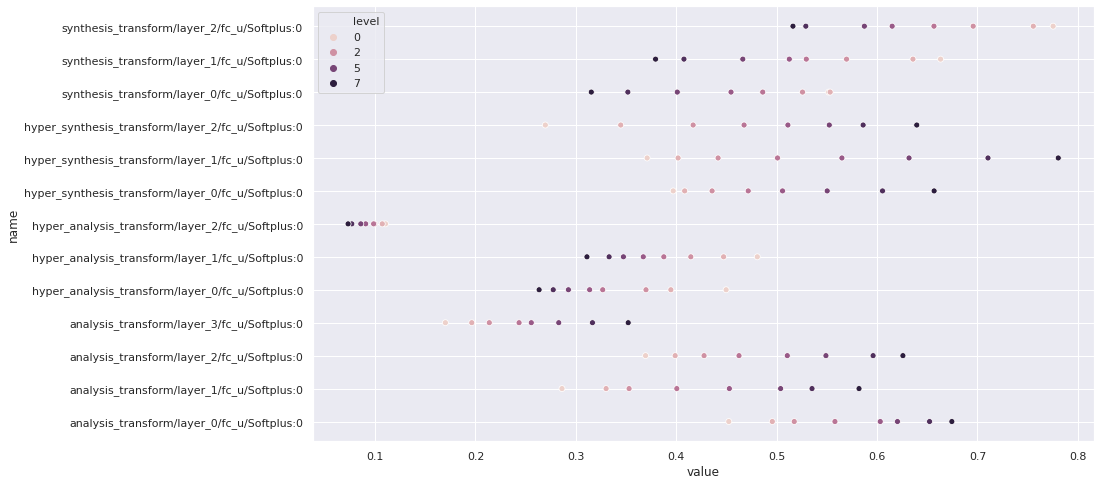

In [90]:
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="value", y="name", hue="level", data=dg)
#xlim(0, 256)
#ylim(0,1)
#xticks(myticks)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(loc=2,handles=handles[1:], labels=labels[1:])

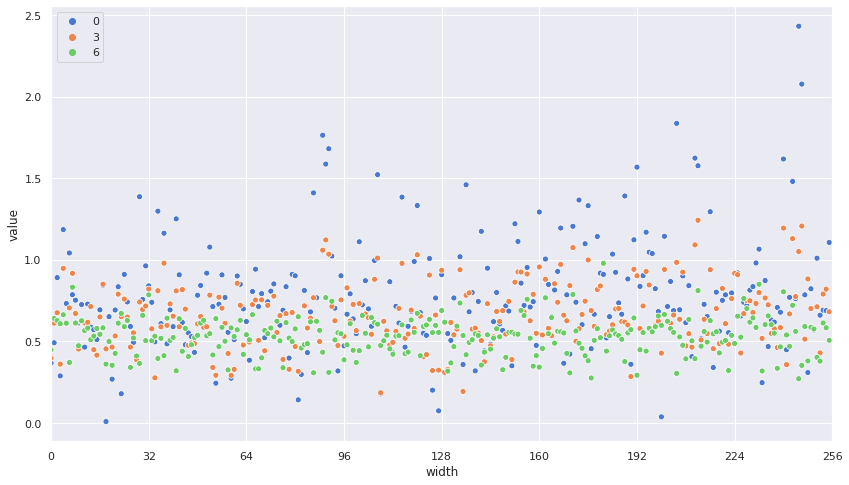

In [55]:
df = data[data.name=="synthesis_transform/layer_2/fc_u/Softplus:0"][data.level.isin([0,3,6])]
fig, ax = subplots(figsize=(14, 8))
sns.set(style="darkgrid")
sns.scatterplot(x="width", y="value", hue="level", palette="muted", data=df)
xlim(0, 256)
#ylim(0,1)
xticks(myticks)
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=2,handles=handles[1:], labels=labels[1:])

# Y-Z bpp dist

In [69]:
data = pd.read_csv("draw/origin y-z bpp dist.csv")
data["width"]=range(1,257)
df = pd.melt(data, id_vars=["width"], value_vars=["z","y"], var_name="class", value_name="bpp")

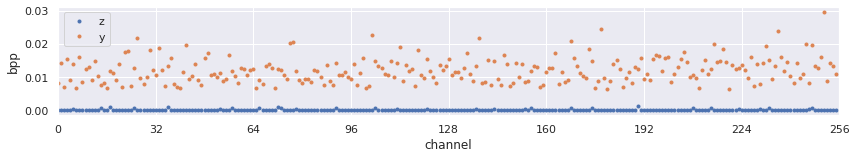

In [52]:
from pylab import *
figure(figsize=(14,2))
axis([0,256,None,None])
plot(data["z"], '.', label='z')
plot(data["y"], '.', label='y')
xticks(myticks)
xlabel("channel")
ylabel("bpp")
legend(loc='upper upper')

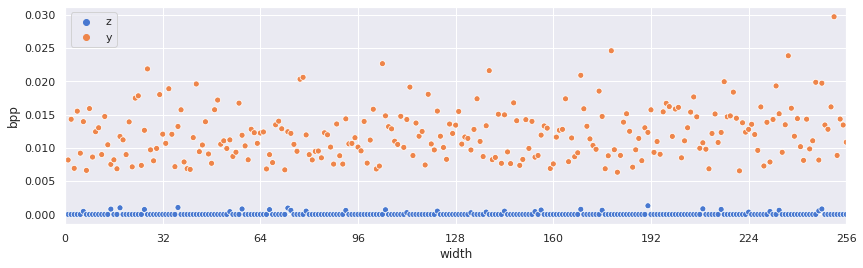

In [76]:
#= subplots()
fig, ax = subplots(figsize=(14, 4))
sns.set(style="darkgrid")
sns.scatterplot(x="width", y="bpp", hue="class", palette="muted", data=df)
xlim(0, 256)
xticks(myticks)
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=2,handles=handles[1:], labels=labels[1:])
#fig.savefig("1.pdf")